<a href="https://colab.research.google.com/github/zildj/CPE695-Applied-Machine-Learning/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


In [0]:
f=pd.read_csv("Titanic.csv")
data=f[["pclass","sex", "age","sibsp"]].values
for i in range(data[0].size):
    data[:,i] = preprocessing.LabelEncoder().fit_transform(data[:,i])
xTrain, xTest, yTrain, yTest = train_test_split(data, f.survived.values, test_size=0.30)

In [57]:
# Attempt to optimize sgd solver
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation="logistic", solver="sgd", learning_rate="adaptive", momentum=0.9, alpha=1e-5)
clf.fit(xTrain, yTrain)
print("In-sample score (training): ",clf.score(xTrain,yTrain))
print(classification_report(yTrain, clf.predict(xTrain)))
print("Out-of-sample score (testing): ",clf.score(xTest,yTest))
print(classification_report(yTest, clf.predict(xTest)))

In-sample score (training):  0.6048034934497817
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       554
           1       0.00      0.00      0.00       362

    accuracy                           0.60       916
   macro avg       0.30      0.50      0.38       916
weighted avg       0.37      0.60      0.46       916

Out-of-sample score (testing):  0.648854961832061
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       255
           1       0.00      0.00      0.00       138

    accuracy                           0.65       393
   macro avg       0.32      0.50      0.39       393
weighted avg       0.42      0.65      0.51       393



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
# adam solver much better out of the box
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation="logistic", solver="adam")
clf.fit(xTrain, yTrain)
print("In-sample score (training): ",clf.score(xTrain,yTrain))
print(classification_report(yTrain, clf.predict(xTrain)))
print("Out-of-sample score (testing): ",clf.score(xTest,yTest))
print(classification_report(yTest, clf.predict(xTest)))

In-sample score (training):  0.7838427947598253
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       554
           1       0.78      0.62      0.70       362

    accuracy                           0.78       916
   macro avg       0.78      0.76      0.76       916
weighted avg       0.78      0.78      0.78       916

Out-of-sample score (testing):  0.7913486005089059
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       255
           1       0.74      0.62      0.68       138

    accuracy                           0.79       393
   macro avg       0.78      0.75      0.76       393
weighted avg       0.79      0.79      0.79       393



In-sample score (training):  0.7903930131004366
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       554
           1       0.77      0.68      0.72       362

    accuracy                           0.79       916
   macro avg       0.78      0.77      0.78       916
weighted avg       0.79      0.79      0.79       916

Out-of-sample score (testing):  0.7913486005089059
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       255
           1       0.72      0.67      0.69       138

    accuracy                           0.79       393
   macro avg       0.77      0.76      0.77       393
weighted avg       0.79      0.79      0.79       393



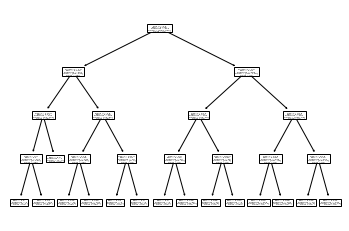

In [59]:
# compared to pruned tree from HW 3
clfTree = tree.DecisionTreeClassifier(max_depth=4)
clfTree = clfTree.fit(xTrain,yTrain)
tree.plot_tree(clfTree, feature_names=["pclass","sex", "age","sibsp"], class_names=["no","yes"])
print("In-sample score (training): ",clfTree.score(xTrain,yTrain))
print(classification_report(yTrain, clfTree.predict(xTrain)))
print("Out-of-sample score (testing): ",clfTree.score(xTest,yTest))
print(classification_report(yTest, clfTree.predict(xTest)))